In [18]:
#install.packages("caret", dependencies = c("Depends", "Suggests"))
#install.packages("caret")
#library(caret)
#install.packages("ggplot2")
library(ggplot2)   #probably redundant
#install.packages("labeling")
library(labeling)  #not used
#install.packages("corrplot")
library(corrplot)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'corrplot' was built under R version 3.3.3"

In [ ]:
Galaxy <- read.csv("https://raw.githubusercontent.com/ggodreau/rnotebook/master/GalaxyLargeMatrix.csv", header = TRUE)
head(Galaxy)

In [19]:
# As I am working with Galaxy Sentiment, I will use all the samsung variables
df_Galaxy=Galaxy[,grepl("^samsung*",names(Galaxy))]
#removing samsunggalaxy because this factor also appears in the (to be) merged nzv matrix
df_Galaxy$samsunggalaxy<-NULL

Don't know how to automatically pick scale for object of type data.frame. Defaulting to continuous.


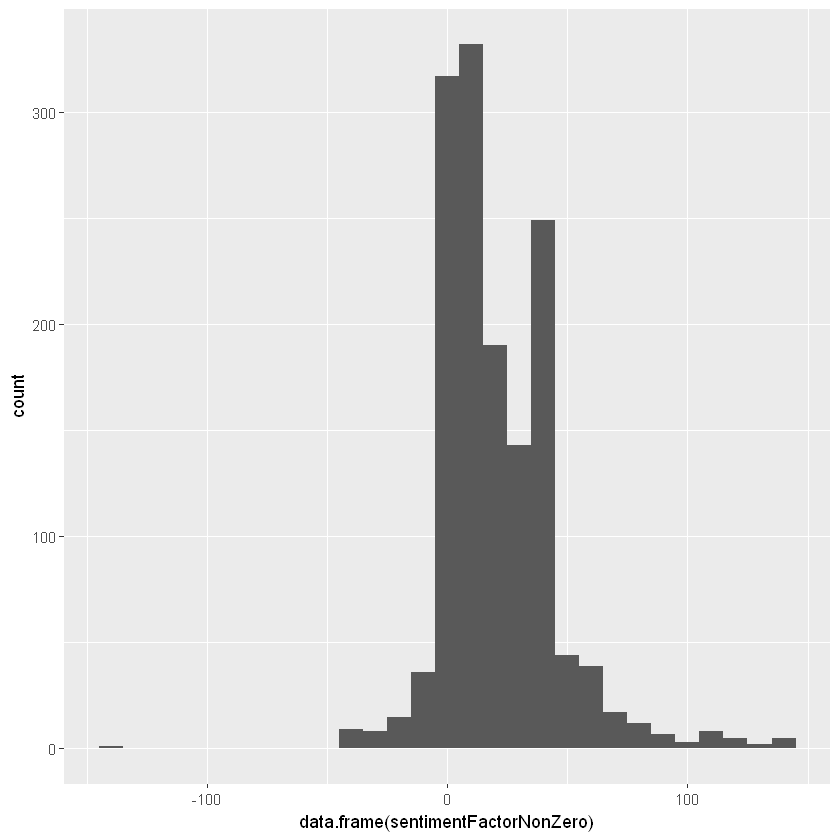

In [21]:
# create a df of sentiment only (for histogram)
sentimentFactor <- data.frame(as.numeric(Galaxy[,ncol(Galaxy)]))
# remove zeroes
sentimentFactorNonZero <- subset(data.frame(sentimentFactor), sentimentFactor != 0)

# remove outliers (> +/- 3 stdevs)
sentimentFactorNonZero <- (
  subset(
    data.frame(sentimentFactorNonZero),
    sentimentFactorNonZero < 3*sd(sentimentFactorNonZero[,1]) &
      sentimentFactorNonZero > -3*sd(sentimentFactorNonZero[,1])
  )
)

# reset the df index, needed for charting
sentimentFactorNonZero <- data.frame(sentimentFactorNonZero[,1])

ggplot(sentimentFactorNonZero,
       aes(
         x = data.frame(sentimentFactorNonZero)
       )
) + geom_histogram(binwidth = 10)